In [6]:
!pip install numpy 
!pip install pandas
!pip install seaborn
!pip install matplotlib
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv("water_dataset.csv")
df.head()

,TDS (mg/l),Turbidity (NTU),pH,Depth (m),Flow Discharge (L/min),Filter Life Span (hours),Filter Efficiency (%)
0,187.270,4.487,6.459,1.903,21.447,4394.721,90.079
1,475.357,8.630,8.446,4.731,9.709,3982.861,87.321
2,365.997,8.695,6.364,0.974,37.508,4146.319,88.696
3,299.329,4.707,7.632,1.951,18.038,4446.934,90.701
4,78.009,9.729,6.033,3.438,50.817,3932.351,86.734


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19656 entries, 0 to 19655
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   TDS (mg/l)                19656 non-null  float64
 1   Turbidity (NTU)           19656 non-null  float64
 2   pH                        19656 non-null  float64
 3   Depth (m)                 19656 non-null  float64
 4   Flow Discharge (L/min)    19656 non-null  float64
 5   Filter Life Span (hours)  19656 non-null  float64
 6   Filter Efficiency (%)     19656 non-null  float64
dtypes: float64(7)
memory usage: 1.0 MB


In [10]:
# Features & Target
X = df[['TDS (mg/l)', 'Turbidity (NTU)', 'pH', 'Depth (m)', 'Flow Discharge (L/min)']]
y = df['Filter Life Span (hours)']

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [12]:
# 🔹 Step 2: Train-Test Split & Scaling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [13]:
!pip install xgboost
!pip install joblib

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
import xgboost as xgb
import joblib

In [ ]:
# 🔹 Step 3: Train XGBoost Regressor
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
_ = model.fit(X_train_scaled, y_train)

In [17]:
# 🔹 Step 4: Evaluate
y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Squared Error: 418.95
R² Score: 0.99


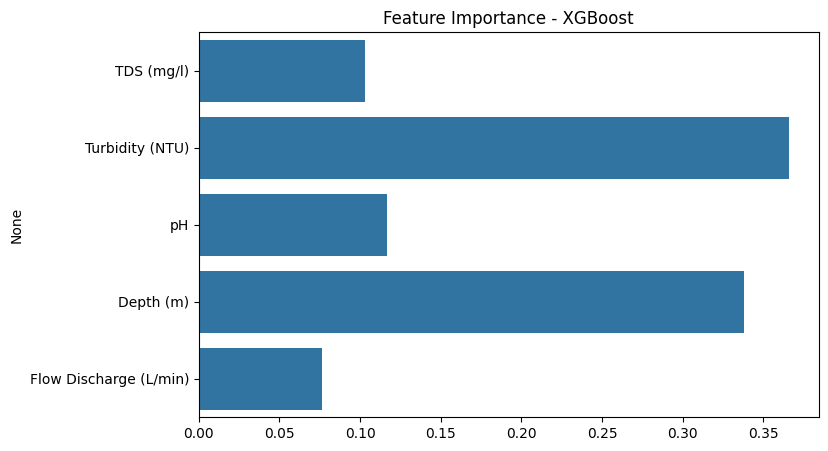

In [18]:
# 🔹 Step 5: Feature Importance
importances = model.feature_importances_
features = X.columns

plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance - XGBoost")
plt.show()

In [19]:
# 🔹 Step 6: Save Model and Scaler
joblib.dump(model, 'filter_lifespan_xgb_model.pkl')
joblib.dump(scaler, 'filter_scaler.pkl')


['filter_scaler.pkl']